<a href="https://colab.research.google.com/github/TeamAlma/Play-Store-Analysis-EDA-AlmaBetter/blob/main/Play_Store_App_Review_Analysis(Capstone_Project_1)_Harisha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b> Play Store App Review Analysis(EDA)
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.

Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.

Explore and analyze the data to discover key factors responsible for app engagement and success.




#<b> Import libraries/packages


In [13]:
pip install pandas 

In [14]:
#import library
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool
%matplotlib inline

#<b> Loading Dataset: Play Store Data

In [15]:
#read to Play store csv files
apps_df = pd.read_csv('/content/drive/MyDrive/PROJECT/Play Store Data.csv')

###Checking for Columns in the dataset-Play store data.csv

In [17]:
apps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [16]:
print('Number of Rows',apps_df.shape[0])
print('Number of Columns',apps_df.shape[1])#To Find shape of our Dataset(no.of rows & coloumns)

Number of Rows 10841
Number of Columns 13


###Understanding data sets

In [18]:
apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
apps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


###To Understand overall statistics about the dataframe

In [20]:
apps_df.describe(include='all')#Overall statistics about the df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


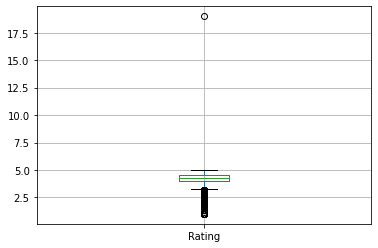

In [21]:
apps_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b9362ed10>]],
      dtype=object)

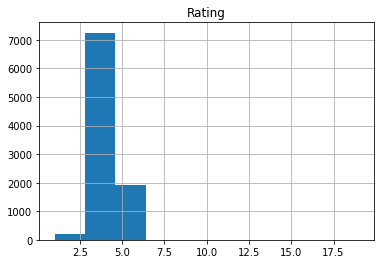

In [22]:
apps_df.hist()

In [23]:
apps_df.nunique()#to understand unique values

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [24]:
apps_df['App'].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [25]:
apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#<B> Cleaning Data

In [26]:
apps_df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [27]:
apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## To check how many ratings are more than 5 - Outliers

In [28]:
apps_df[apps_df.Rating > 5] # To check the rating value>5

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [29]:
apps_df.drop(apps_df.index[10472], inplace=True)# Row 10472 removed due to missing value of Category

###Row 10472 removed due to data mismatch in the category

In [30]:
apps_df[10470:10475]#To check whether row 10472 has been removed or not.

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


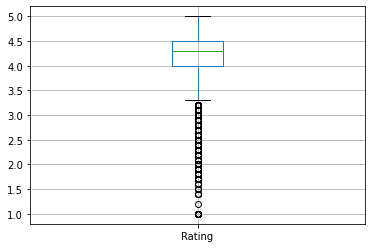

In [31]:
apps_df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b92f86610>]],
      dtype=object)

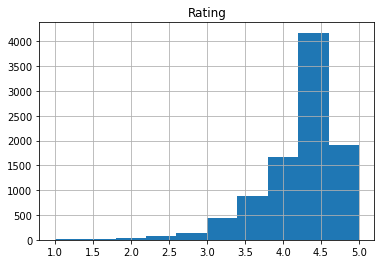

In [32]:
apps_df.hist()#Rightly skewed

##Data Imputation and Manipulation
Fill the null values with appropriate values using aggreagate functions such as mean,median or mode.

In [33]:
def inpute_median(series):
  return series.fillna(series.median())#Define a function inpute_median

In [34]:
apps_df.Rating = apps_df['Rating'].transform(inpute_median)

In [35]:
apps_df.isnull().sum()#count the number of null values to each column

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [36]:
#modes of categorical values
print(apps_df['Type'].mode())
print(apps_df['Current Ver'].mode())
print(apps_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [37]:
# Fill the missing categorical values with mode
apps_df['Type'].fillna(str(apps_df['Type'].mode().values[0]),inplace=True)
apps_df['Current Ver'].fillna(str(apps_df['Current Ver'].mode().values[0]),inplace=True)
apps_df['Android Ver'].fillna(str(apps_df['Android Ver'].mode().values[0]),inplace=True)

In [38]:
apps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

###Converting Price and Installs into Numerical Values.

In [39]:
apps_df['Price'] = apps_df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
apps_df['Price'] = apps_df['Price'].apply(lambda x: float(x))#Removing '$' from the values.

In [40]:
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
apps_df['Installs'] = apps_df['Installs'].apply(lambda x: float(x))#Removing '+' from the values.

In [41]:
apps_df.info()#Check for missing values.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.2+ MB


In [42]:
apps_df['Installs'].min(),apps_df['Installs'].max()

(0.0, 1000000000.0)

###Hence, there is a high variance in the number of installs,we need to remove this. For that, we are adding a new column to dataframe, which is the log of number of installs.

In [43]:
apps_df['log_installs'] = np.log2(apps_df['Installs'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


###Checking, if the dataframe contains any duplicate values for the same App name.


In [44]:
boolean = apps_df['App'].duplicated().any()
boolean

True

In [45]:
apps_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
8 Ball Pool                                          7
ESPN                                                 7
Candy Crush Saga                                     7
                                                    ..
+Download 4 Instagram Twitter                        1
Alarm Clock Free                                     1
C.B. Shop                                            1
The List                                             1
Where Am I? GPS Loc                                  1
Name: App, Length: 9659, dtype: int64

###In the above mentioned data, some of the apps are having multiple rows. Let's check out if the data is identical or not.


In [46]:
apps_df[apps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs
1653,ROBLOX,GAME,4.5,4447388,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1701,ROBLOX,GAME,4.5,4447346,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1748,ROBLOX,GAME,4.5,4448791,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1841,ROBLOX,GAME,4.5,4449882,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
1870,ROBLOX,GAME,4.5,4449910,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2016,ROBLOX,FAMILY,4.5,4449910,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2088,ROBLOX,FAMILY,4.5,4450855,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
2206,ROBLOX,FAMILY,4.5,4450890,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425
4527,ROBLOX,FAMILY,4.5,4443407,67M,100000000.0,Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up,26.575425


###As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.


In [47]:
apps_df.drop_duplicates(inplace=True)

###Converting type of Reviews column to number


In [48]:
apps_df['Reviews'] = pd.to_numeric(apps_df['Reviews'].str.replace('$',''))

In [49]:
apps_df = apps_df.loc[apps_df.groupby(['App'])['Reviews'].idxmax()]

In [50]:
apps_df.describe()#Summary statistics after cleaning

,Rating,Reviews,Installs,Price,log_installs
count,9659.000000,9.659000e+03,9.659000e+03,9659.000000,9659.000000
mean,4.192463,2.168041e+05,7.798170e+06,1.097231,-inf
std,0.496055,1.831430e+06,5.376973e+07,16.851618,NaN
min,1.000000,0.000000e+00,0.000000e+00,0.000000,-inf
25%,4.000000,2.500000e+01,1.000000e+03,0.000000,9.965784
50%,4.300000,9.690000e+02,1.000000e+05,0.000000,16.609640
75%,4.500000,2.945350e+04,1.000000e+06,0.000000,19.931569
max,5.000000,7.815831e+07,1.000000e+09,400.000000,29.897353


#<B> Exploratory analysis and Data Visualization

###Setting up the parameters for the plots




In [51]:
sns.set_style('darkgrid')
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

###Grouping all Apps storing in group

In [52]:
grp = apps_df.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)#grouping all apps storing in grp

Category
ART_AND_DESIGN         4.357377
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.334234
BUSINESS               4.173810
COMICS                 4.185714
COMMUNICATION          4.154921
DATING                 4.050000
EDUCATION              4.354206
ENTERTAINMENT          4.129885
EVENTS                 4.395313
FAMILY                 4.197439
FINANCE                4.138551
FOOD_AND_DRINK         4.191964
GAME                   4.247357
HEALTH_AND_FITNESS     4.251736
HOUSE_AND_HOME         4.167123
LIBRARIES_AND_DEMO     4.207143
LIFESTYLE              4.131436
MAPS_AND_NAVIGATION    4.062595
MEDICAL                4.201519
NEWS_AND_MAGAZINES     4.156693
PARENTING              4.300000
PERSONALIZATION        4.325532
PHOTOGRAPHY            4.165125
PRODUCTIVITY           4.206150
SHOPPING               4.238119
SOCIAL                 4.255230
SPORTS                 4.232923
TOOLS                  4.074427
TRAVEL_AND_LOCAL       4.103196

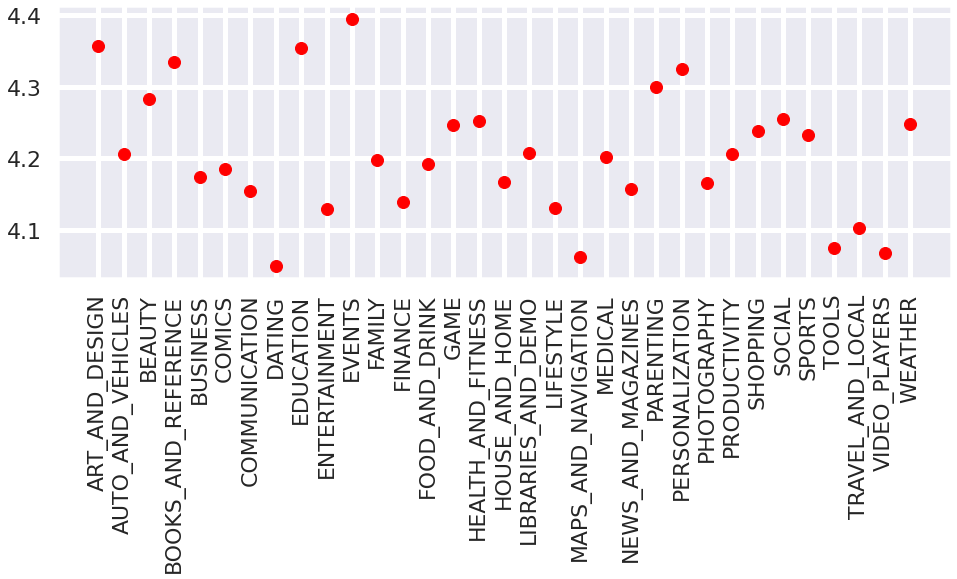

In [53]:
plt.figure(figsize=(16,5))
plt.plot(x, 'ro')
plt.xticks(rotation=90)
plt.show()

##Category wise Rating

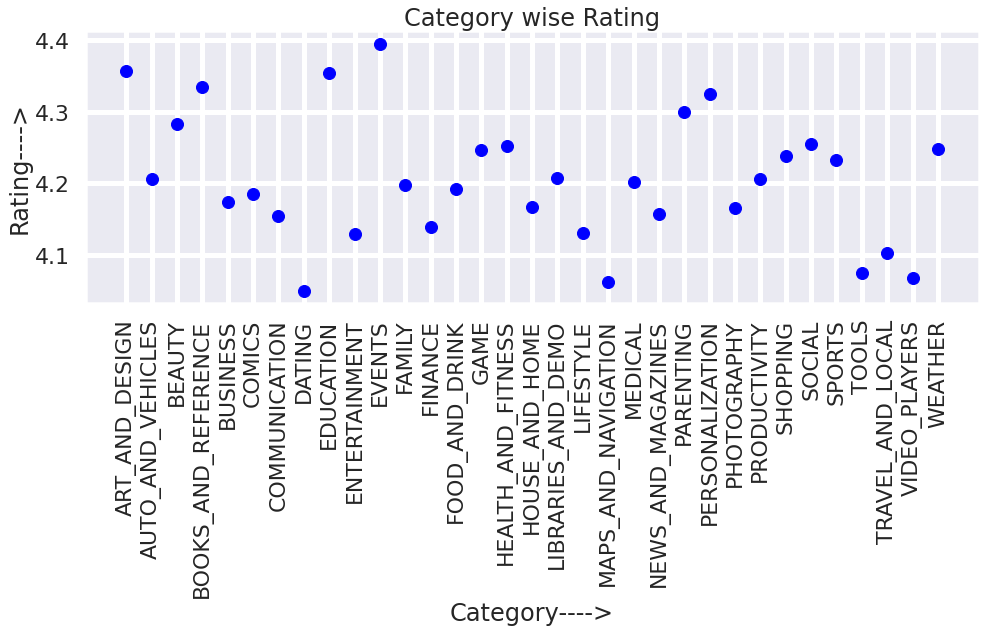

In [54]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro',color = 'b')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Category---->')
plt.ylabel('Rating---->')
plt.show()

##The Events, Art and Design, Education Categories has got the highest Ratings i.e. 4 and above. Whereas, Dating, Maps and navigation, Video players category has got lowest ratings i.e. below 4.

##Category wise Pricing

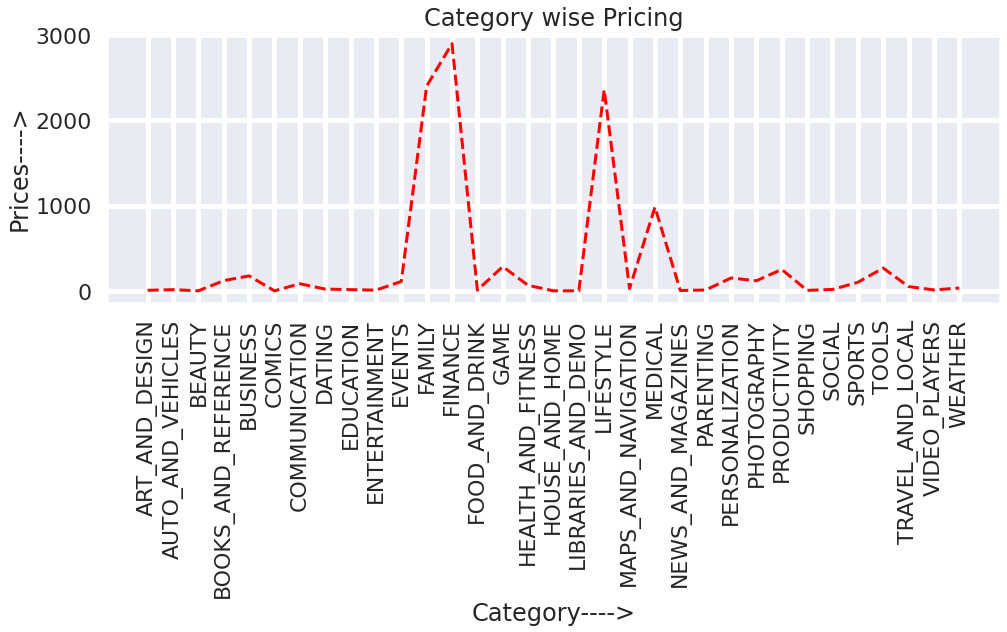

In [55]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='r')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Category---->')
plt.ylabel('Prices---->')
plt.show()

##The Finance, Lifestyle and Medical Category has got the highest pricing.

##Category wise Reviews

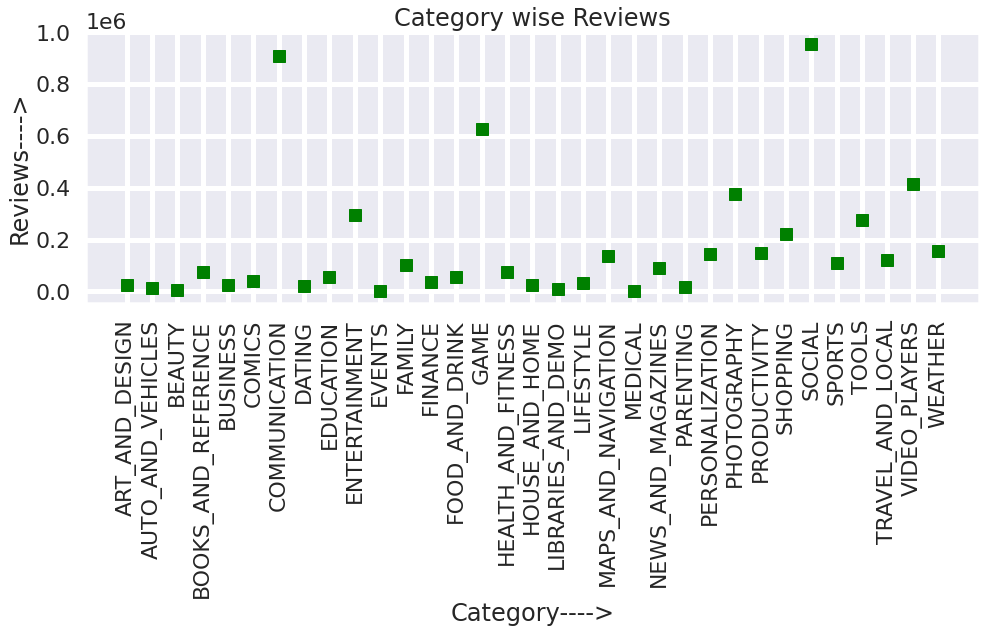

In [56]:
plt.figure(figsize=(16,5))
plt.plot(z,'bs', color='g')
plt.xticks(rotation=90)
plt.title('Category wise Reviews')
plt.xlabel('Category---->')
plt.ylabel('Reviews---->')
plt.show()

##The Social, communication and Game category got the highest Reviews.

## Category wise Rating

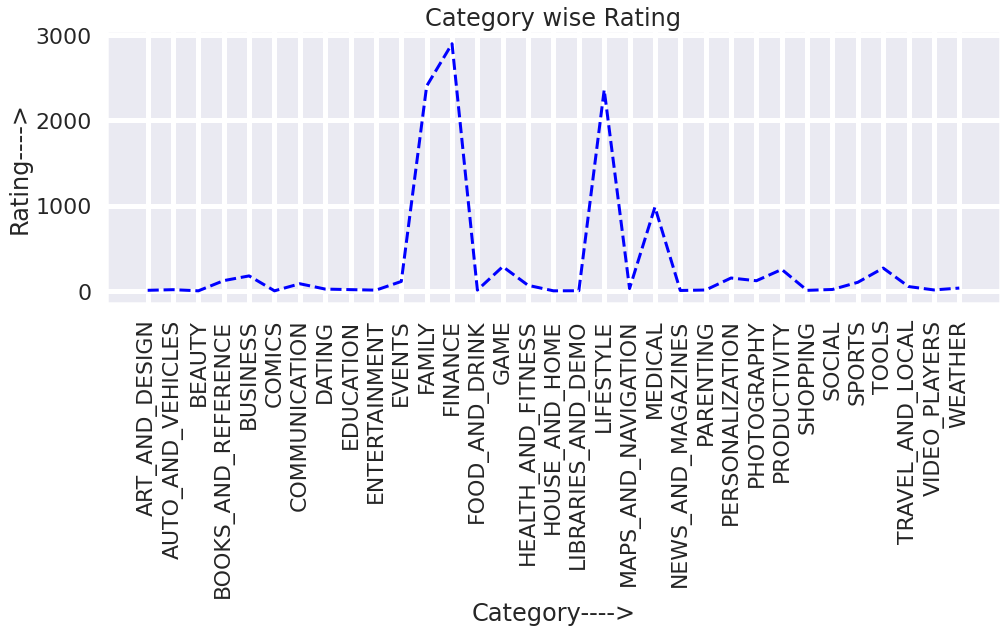

In [57]:
plt.figure(figsize=(16,5))
plt.plot(y,'b--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Rating')
plt.xlabel('Category---->')
plt.ylabel('Rating---->')
plt.show()

##The Finance, Life Stlye and Medical Category has got the highest.
ratings i.e. 4 and above

###What are the top 20 apps present in the Play store as per their Genres?


In [58]:
top_genres = apps_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [59]:
genres_installs = apps_df.groupby(['Genres'])[['Installs']].sum()

In [60]:
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


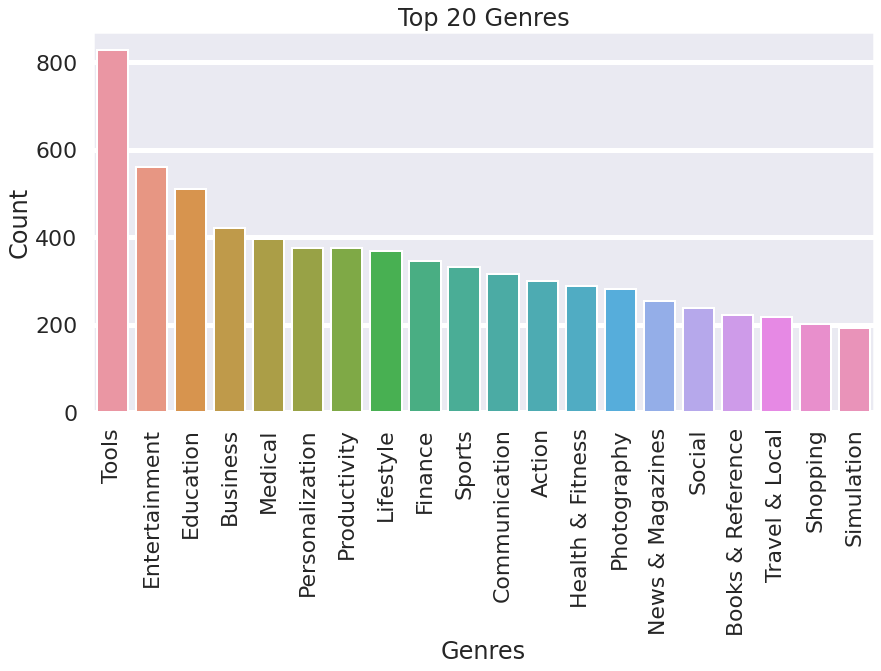

In [61]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()

###Which are the Genres that are getting installed the most in top 20 Genres?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


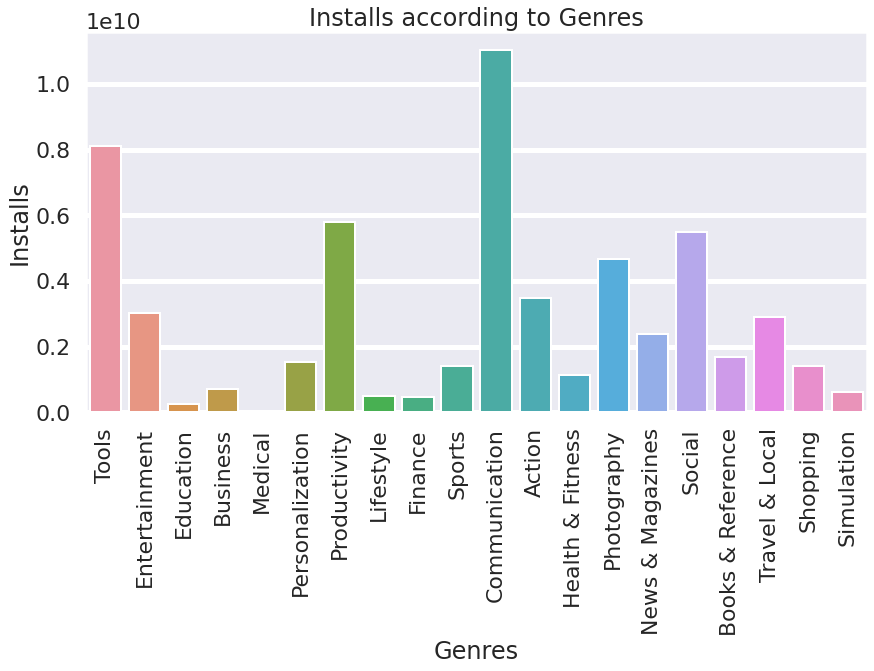

In [62]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Installs")
plt.title("Installs according to Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Installs)
plt.show()

###From the above two plots: Maximum number of apps present in play store comes under Tools, Entertainment and Education Genres but as per the installation and requirement in the market plot, scenario is not the same. Maximum installed apps comes under Communication, Tools and Productivity Genres.

In [63]:
top_category = apps_df.Category.value_counts().reset_index().rename(columns={'Category':'Count','index':'Category'})

In [64]:
category_installs = apps_df.groupby(['Category'])[['Installs']].sum()

In [65]:
top_category_installs = pd.merge(top_category, category_installs, on='Category')
top_20_category_installs = top_category_installs

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


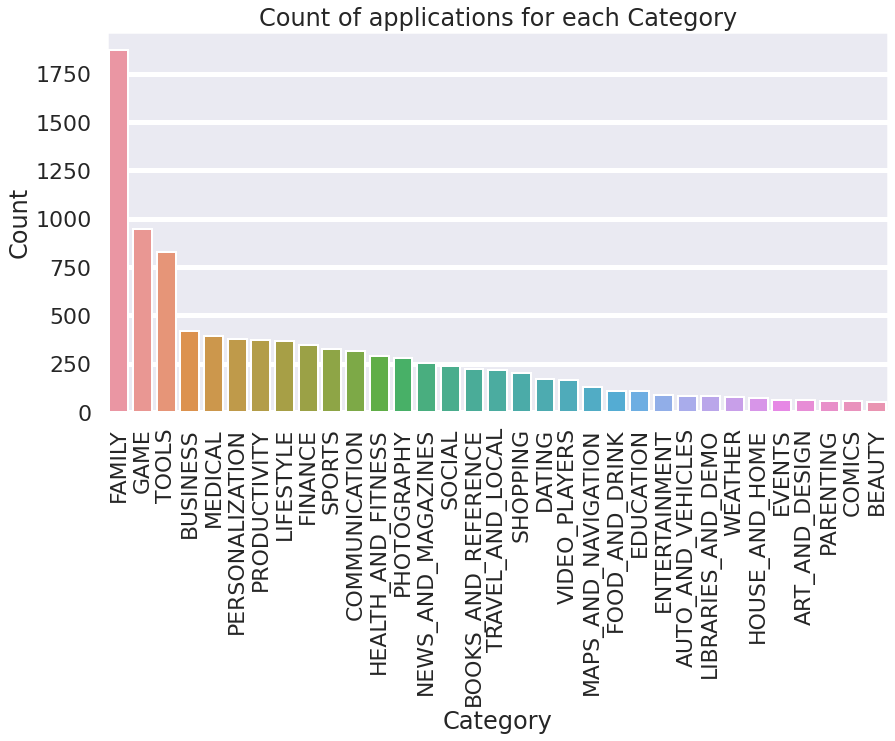

In [66]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of application")
plt.title("Count of applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Count)
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


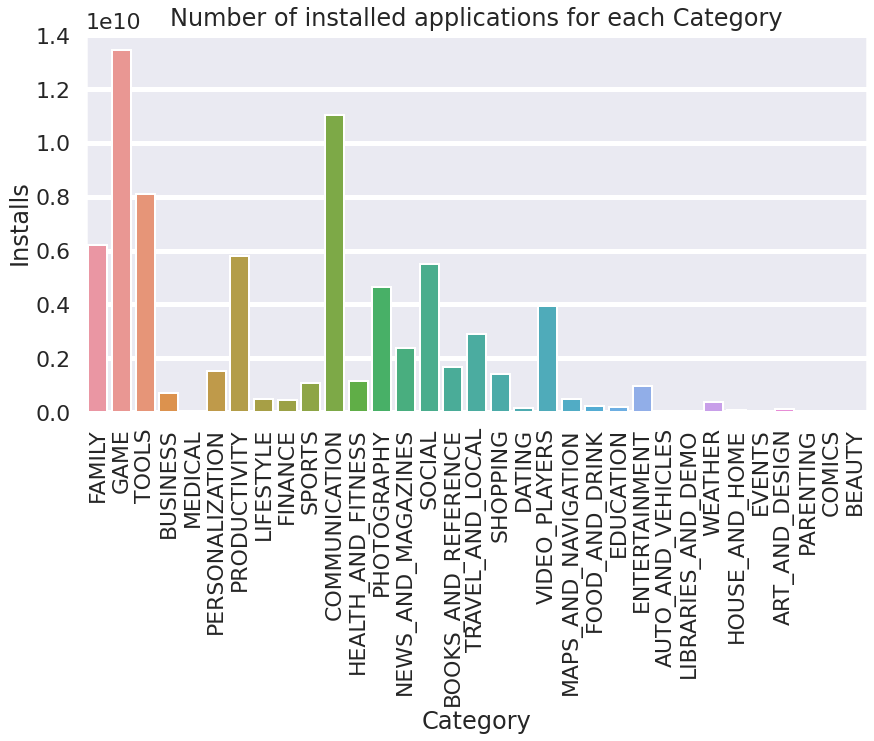

In [67]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installed applications for each Category")
sns.barplot(top_20_category_installs.Category, top_20_category_installs.Installs)
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
plt.show()

###From the above two plots: Maximum number of apps present in play store comes under Family, Game and Tools Category but as per the number of installed applications for each category is not the same. Maximum installed apps comes under Game, Communication and Tools category.

###Checking the Average rating

In [68]:
genres_ratings_df = apps_df.groupby(['Genres'])[['Rating']].mean()

In [69]:
genres_installs_ratings = pd.merge(top_genres_installs, genres_ratings_df, on='Genres')

In [70]:
genres_installs_ratings['Rating'].describe()

count    118.000000
mean       4.258494
std        0.169659
min        3.800000
25%        4.155364
50%        4.260948
75%        4.341071
max        4.800000
Name: Rating, dtype: float64

###To find Average App Rating

In [71]:
apps_df['Rating'].mean()#average App Rating

4.192462987886934

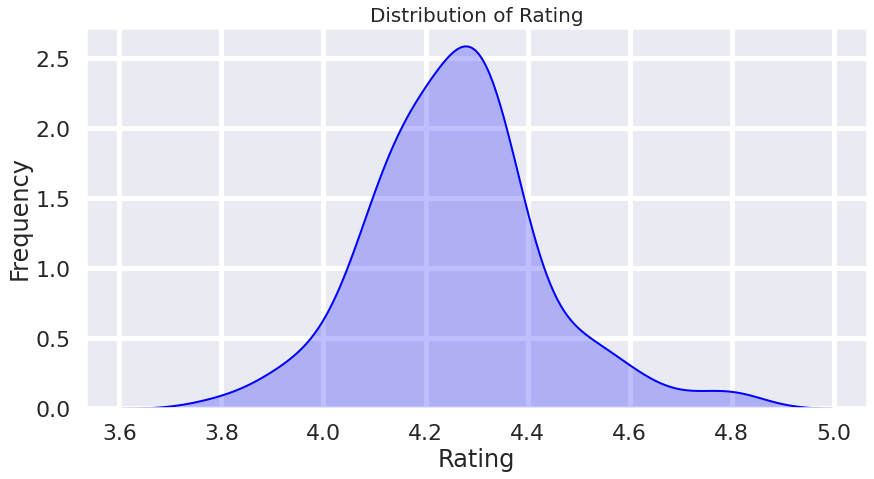

In [72]:
plt.figure(figsize=(14,7))
g = sns.kdeplot(genres_installs_ratings.Rating, color="Blue", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 20)
plt.show()

##Which category has the highest Average Rating

In [73]:
apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False)# To understand the highest Average Rating?

Category
EVENTS                 4.395313
ART_AND_DESIGN         4.357377
EDUCATION              4.354206
BOOKS_AND_REFERENCE    4.334234
PERSONALIZATION        4.325532
PARENTING              4.300000
BEAUTY                 4.283019
SOCIAL                 4.255230
HEALTH_AND_FITNESS     4.251736
WEATHER                4.248101
GAME                   4.247357
SHOPPING               4.238119
SPORTS                 4.232923
LIBRARIES_AND_DEMO     4.207143
PRODUCTIVITY           4.206150
AUTO_AND_VEHICLES      4.205882
MEDICAL                4.201519
FAMILY                 4.197439
FOOD_AND_DRINK         4.191964
COMICS                 4.185714
BUSINESS               4.173810
HOUSE_AND_HOME         4.167123
PHOTOGRAPHY            4.165125
NEWS_AND_MAGAZINES     4.156693
COMMUNICATION          4.154921
FINANCE                4.138551
LIFESTYLE              4.131436
ENTERTAINMENT          4.129885
TRAVEL_AND_LOCAL       4.103196
TOOLS                  4.074427
VIDEO_PLAYERS          4.068293

## Total Number of Apps having 5 star Rating

In [74]:
len(apps_df[apps_df['Rating']==5.0])#To find total number of Apps having 5 star Rating

271

###Highest rated Genres


In [75]:
genres_installs_ratings.sort_values('Rating', ascending =False, inplace=True)

In [76]:
highest_rated_genres = genres_installs_ratings.iloc[0:20]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


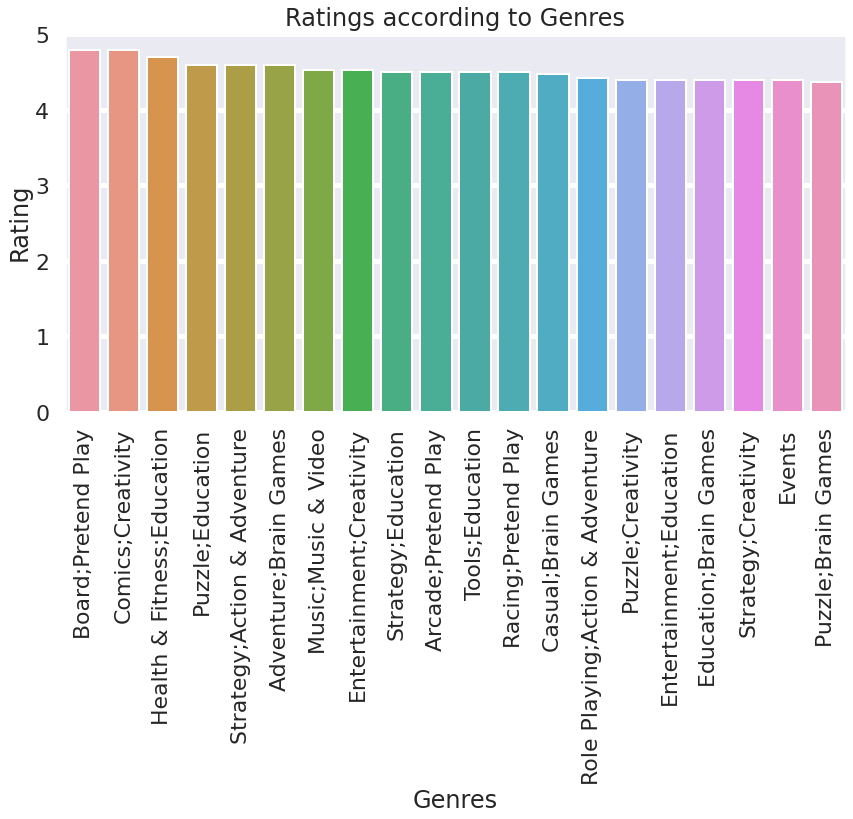

In [77]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(highest_rated_genres.Genres, highest_rated_genres.Rating)
plt.show()

###Lowest rated Genres

In [78]:
lowest_rated_genres = genres_installs_ratings.iloc[-20:]
lowest_rated_genres = lowest_rated_genres[lowest_rated_genres['Rating'].notnull()]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


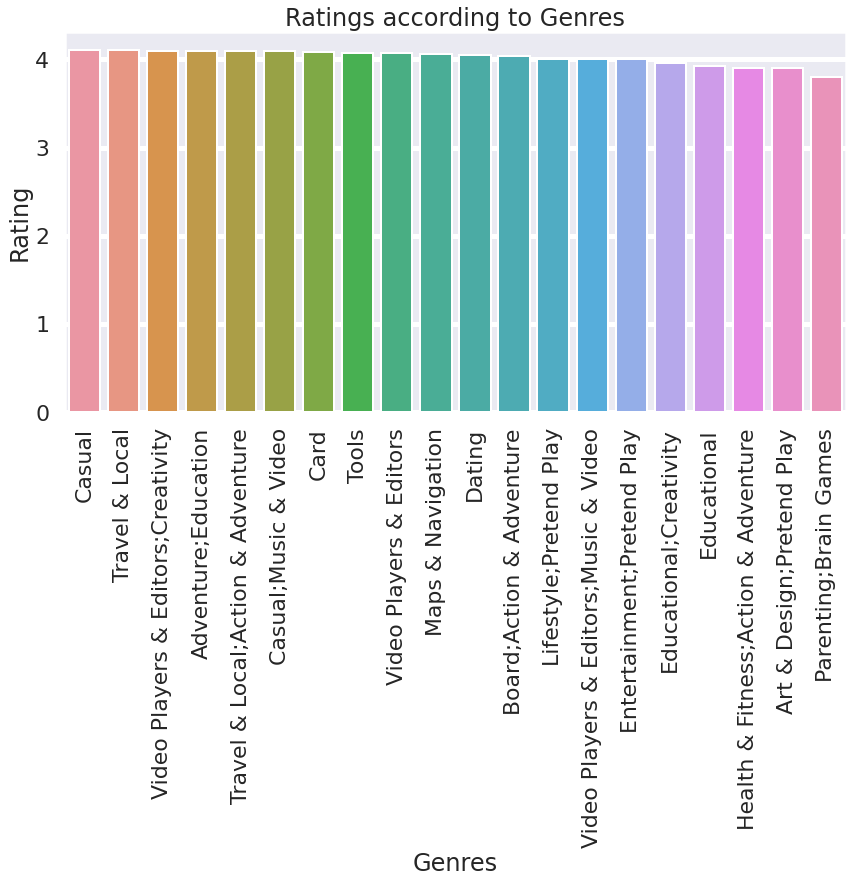

In [79]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Rating")
plt.title("Ratings according to Genres")
sns.barplot(lowest_rated_genres.Genres, lowest_rated_genres.Rating)

###The count of applications in each category differentiated by their type?


In [80]:
app_count = apps_df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})

In [81]:
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

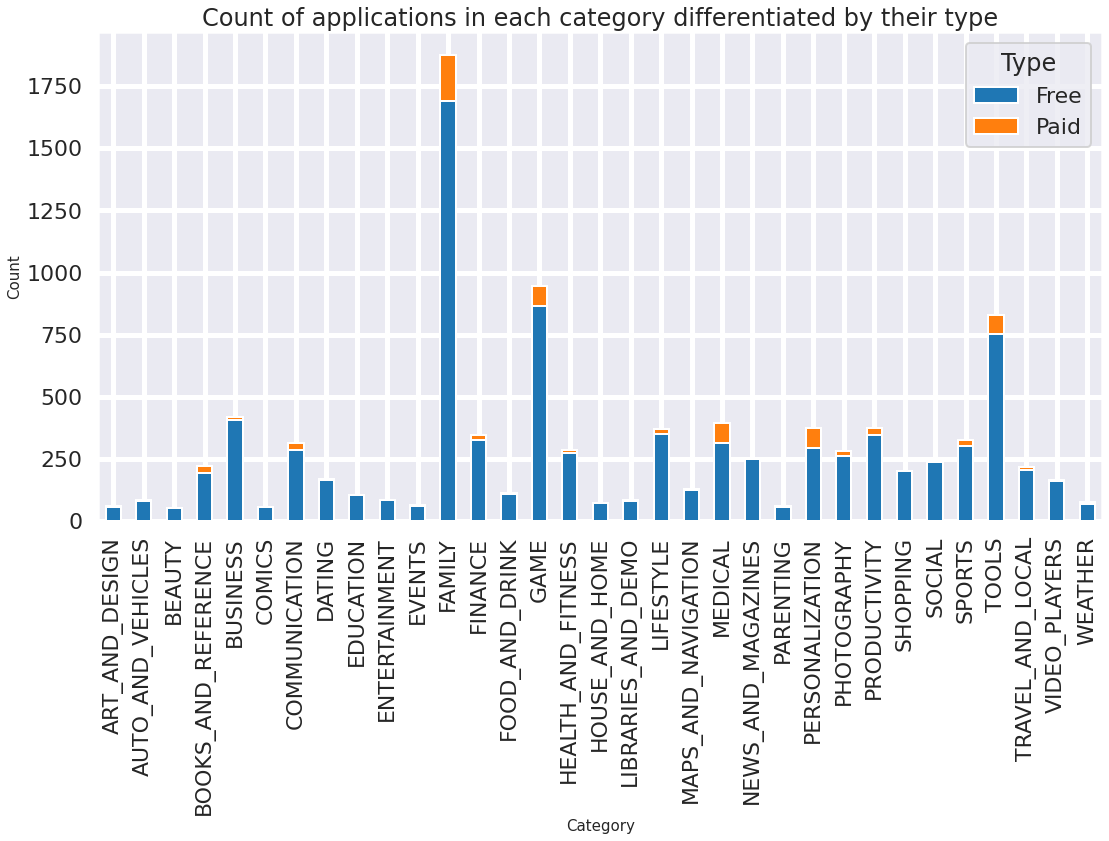

In [82]:
df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

###Certain app categories have more free apps available for download than others. 
###In our dataset, the majority of apps in Family, Game and Tools, as well as Business categories were free to install. 
###At the same time Family, Game, Tools and Medical categories had the biggest number of paid apps available for download.


#How many apps were installed according to its type?


In [83]:
apps_df['Gaming Category App'] = apps_df['Category']=='GAME'

In [84]:
categoty_type_installs = apps_df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [85]:
categoty_type_installs['log_Installs'] = np.log2(categoty_type_installs['Installs'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


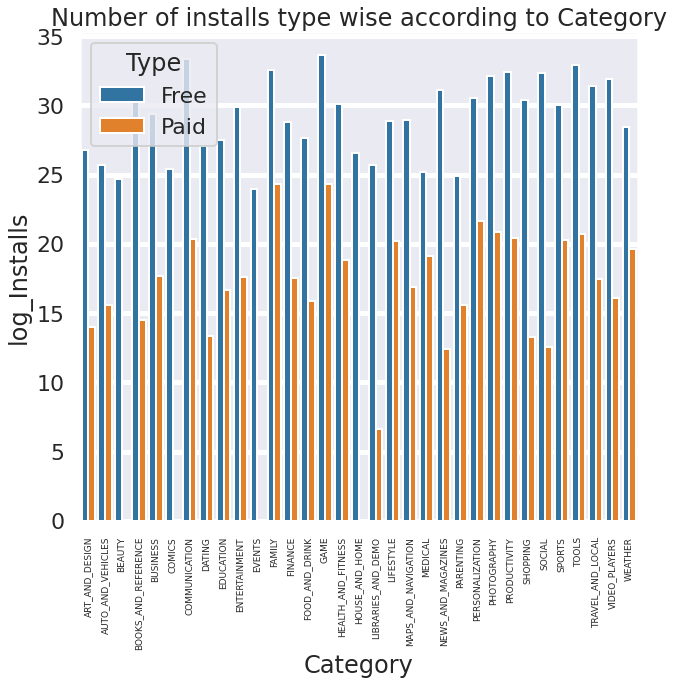

In [86]:
plt.figure(figsize=(10,9))
plt.xticks(rotation=90,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Category")
sns.barplot('Category', 'log_Installs', hue='Type', data=categoty_type_installs);
plt.show()

## Total number of free and paid apps

In [87]:
apps_df['Type'].value_counts()# To know the total number of free and paid apps.

Free    8905
Paid     754
Name: Type, dtype: int64

###The Average rating of free and paid apps

In [88]:
apps_df.groupby('Type')['Rating'].mean()#To find the average rating of free and paid apps 

Type
Free    4.185918
Paid    4.269761
Name: Rating, dtype: float64

##Free vs Paid

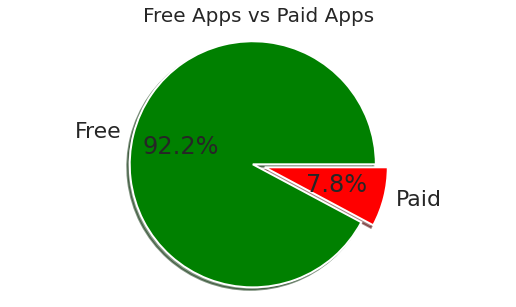

In [102]:
labels = apps_df['Type'].value_counts(sort = True).index
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Paid')
colors = ('green','red')
sizes = apps_df['Type'].value_counts(sort = True)
fig1, ax1 = plt.subplots()
matplotlib.pyplot.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Free Apps vs Paid Apps', fontsize=20)
plt.show()

##Here we can see that 92.2% apps are free and 7.8% apps are paid on Play Store, so we can say that most of the apps are free on Google Play Store.
##Therefore, it can be concluded that the number of free applications installed by the users are high when compared with the paid ones.

##Size of the applications present in the datset are in MB and KB. Therefore for ease in data processing, converting entire size column to MB.

In [103]:
# Converting KB to MB 
apps_df['Size'] = apps_df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
apps_df['Size'] = apps_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
apps_df['Size'] = apps_df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
apps_df['Size'] = apps_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

In [104]:
cols = ['Size','Installs']
apps_df[cols] = apps_df[cols].replace('[^\d.]', '', regex = True).replace('',np.nan).astype(float)
print(apps_df[cols])

        Size   Installs
8884   3.600      500.0
8532  22.000  1000000.0
324    9.100    10000.0
4541   0.203    10000.0
4636  53.000    10000.0
...      ...        ...
6334  59.000   100000.0
4362  26.000    10000.0
2575  18.000  1000000.0
7559   3.200    10000.0
882    4.000  1000000.0

[9659 rows x 2 columns]


##How does size impact on the number of installs of any application?


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


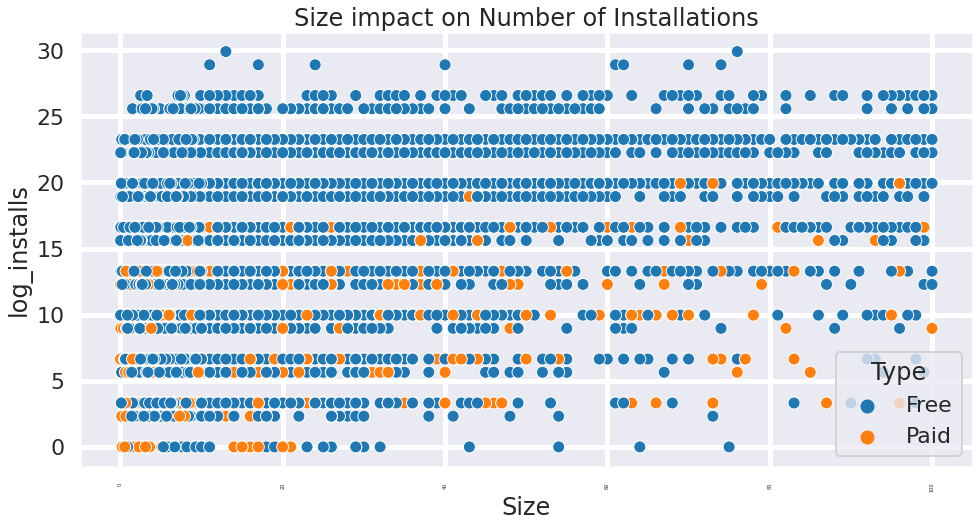

In [105]:
plt.figure(figsize=(16,8))
plt.xticks(rotation=90,fontsize=5)
sns.scatterplot(apps_df['Size'], apps_df['log_installs'], hue=apps_df['Type'])
plt.title("Size impact on Number of Installations")
plt.show()

#It is clear from the above mentioned plot that size may impact the number of installations. Heavy sized applications are less installed by the user.


##Histogram of log installs

In [106]:
apps_df.loc[apps_df['log_installs']==apps_df['log_installs'].min(),'log_installs']=0

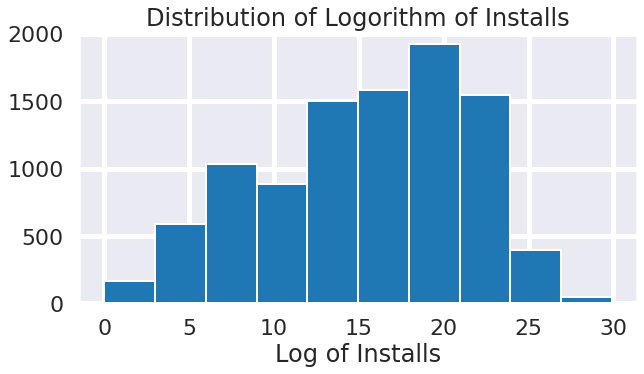

In [107]:
plt.figure(figsize=(10,5))
plt.xlabel("Log of Installs")
plt.title("Distribution of Logorithm of Installs")
plt.hist(apps_df['log_installs']);

###Histogram of size

In [108]:
# to remove null values from size column
apps_df.loc[apps_df['Size'].isnull(),'Size']=0

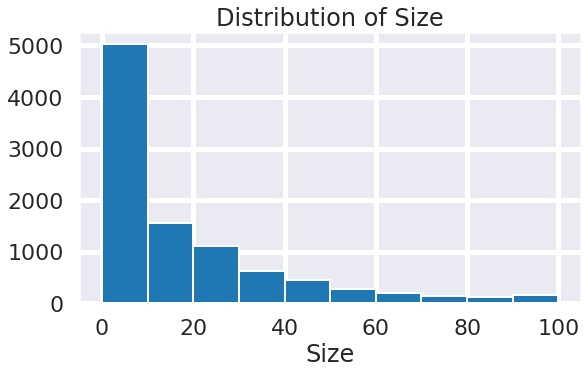

In [109]:
plt.xlabel("Size")
plt.title("Distribution of Size")
plt.hist(apps_df['Size']);
plt.show()

##From the above histogram, it can be concluded that maximum number of applications present in the dataset are of small size.


## The Apps got maximum and minimum reviews.

In [110]:
apps_df[apps_df['Reviews'].max()==apps_df['Reviews']]['App']# To understand which App has got maximum Reviews.

2544    Facebook
Name: App, dtype: object

In [111]:
apps_df[apps_df['Reviews'].min()==apps_df['Reviews']]['App']# To understand which App has got maximum Reviews.

2483                                        14thStreetVet
7382                            1st Fed CI Mobile Banking
9660                                       23rd QM BDE EO
5835    25 Mins Ako ay may lobo Etc Pinoy Kid Song Off...
7745    25WPM Amateur ham radio Koch CW Morse code tra...
                              ...                        
6479                                           orderin.bm
9333                             qEG APP / Química EG SRL
9137                                             quran-DZ
5232                            tournaments and more.aj.2
5832                                         ¡Ay Caramba!
Name: App, Length: 593, dtype: object

## The App got highest and lowest price.

In [112]:
apps_df[apps_df['Price'].max()==apps_df['Price']]['App']# To understand which App has got high price.


4367    I'm Rich - Trump Edition
Name: App, dtype: object

In [113]:
apps_df[apps_df['Price'].min()==apps_df['Price']]['App']# To understand which App has got low price.

8884                "i DT" Fútbol. Todos Somos Técnicos.
8532                       +Download 4 Instagram Twitter
324                           - Free Comics - Comic Apps
4541                                                  .R
4636                                              /u/app
                              ...                       
6420                                         감성학원 BL 첫사랑
6334                             뽕티비 - 개인방송, 인터넷방송, BJ방송
2575       💘 WhatsLov: Smileys of love, stickers and GIF
7559    📏 Smart Ruler ↔️ cm/inch measuring for homework!
882     🔥 Football Wallpapers 4K | Full HD Backgrounds 😍
Name: App, Length: 8905, dtype: object

##Display Top 5 Apps having highest reviews.

In [114]:
index=apps_df['Reviews'].sort_values(ascending=False).head().index# To display Top 5 Apps having Highest Reviews

In [115]:
apps_df.iloc[index]['App']

1171                  Citi Mobile®
9244    AP Stamps and Registration
3676                          Code
3470                ASUS SuperNote
7095                        CA DMV
Name: App, dtype: object

#<B>Loading Dataset: User Reviews

In [116]:
reviews_df = pd.read_csv('/content/drive/MyDrive/PROJECT/User Reviews.csv')

##Merging dataframes on apps


In [117]:
merged_df = apps_df.merge(reviews_df, on="App")

###<B>In the merged dataframe, we have three new columns i.e.. Sentiment, Sentiment Polarity and Sentiment Subjectivity. 
###<B>Sentiment basically determines the view or the opinion of the writer, i.e., whether it is positive or negative or neutral. 
###<B>Sentiment Polarity defines the orientation of the expressed sentiment, it is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement. 
###<B>Sentiment Subjectivity generally refer to personal opinion, emotion or judgment whereas objective refers to factual information, which lies in the range of [0,1].

###What is the distribution of type of reviews in the dataset?


In [118]:
category_sentiment = merged_df.groupby(['Category','Sentiment']).size().reset_index(name='Sentiment Count')

In [119]:
category_sentiment['log_sentiment_count'] = np.log2(category_sentiment['Sentiment Count'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


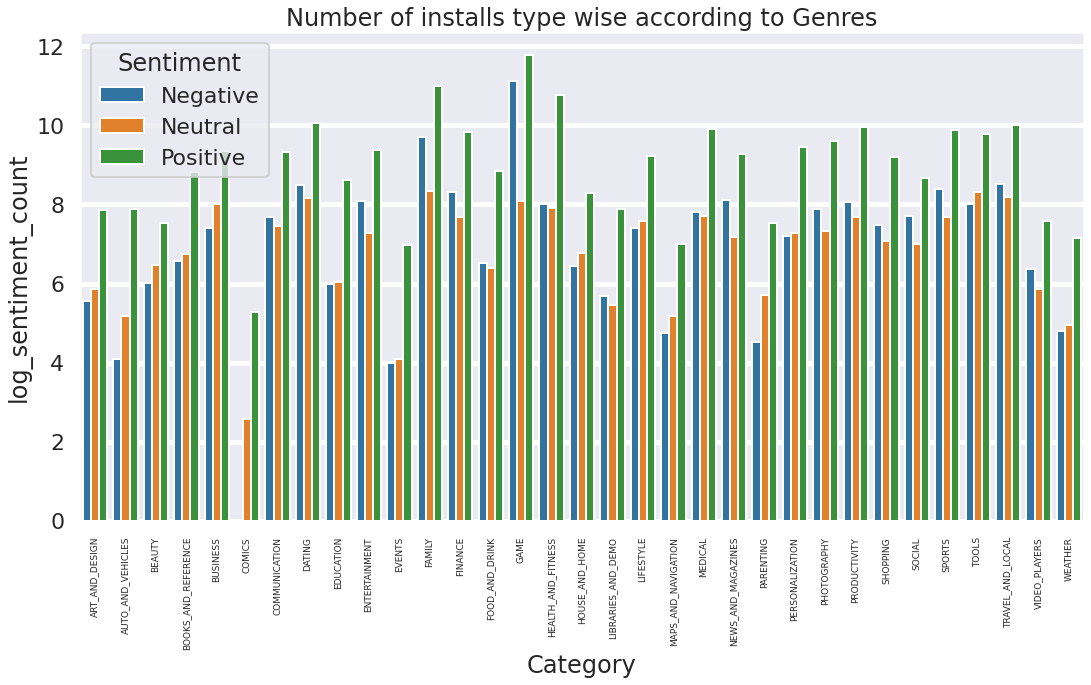

In [120]:
plt.figure(figsize=(18,9))
plt.xticks(rotation=90,fontsize=9)
plt.xlabel("Category")
plt.ylabel("Installs")
plt.title("Number of installs type wise according to Genres")
sns.barplot('Category', 'log_sentiment_count', hue='Sentiment', data=category_sentiment);

##Histogram of subjectivity


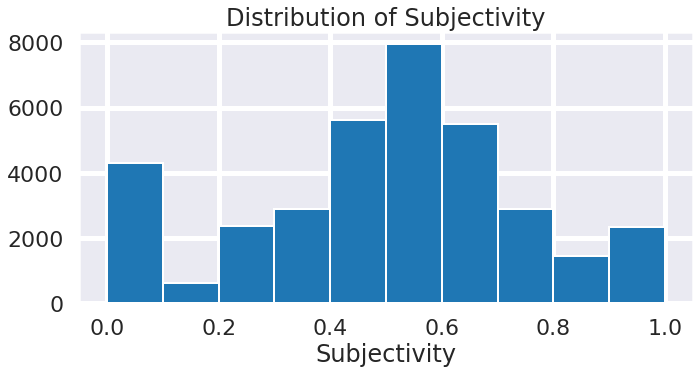

In [122]:
plt.figure(figsize=(11,5))
plt.xlabel("Subjectivity")
plt.title("Distribution of Subjectivity")
plt.hist(merged_df[merged_df['Sentiment_Subjectivity'].notnull()]['Sentiment_Subjectivity'])
plt.show()

##Here the maximum number of sentiment subjectivity lies between 0.4 to 0.7. From this we can conclude that maximum number of users have given reviews to the applications, according to their experience.


##Does sentiment_subjectivity proportional to sentiment_polarity?

In [123]:
sentimet_subjectivity_polarity = merged_df.groupby(['Category'])['Sentiment_Polarity','Sentiment_Subjectivity'].mean().reset_index().rename(columns={'Sentiment_Polarity':'Sentiment_polarity_avg','Sentiment_Subjectivity':'sentiment_subjectivity_avg'})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [124]:
merged_df['Sentiment_Subjectivity'] = merged_df['Sentiment_Subjectivity'].abs()

In [125]:
merged_df['Sentiment_Polarity'] = merged_df['Sentiment_Polarity'].abs()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


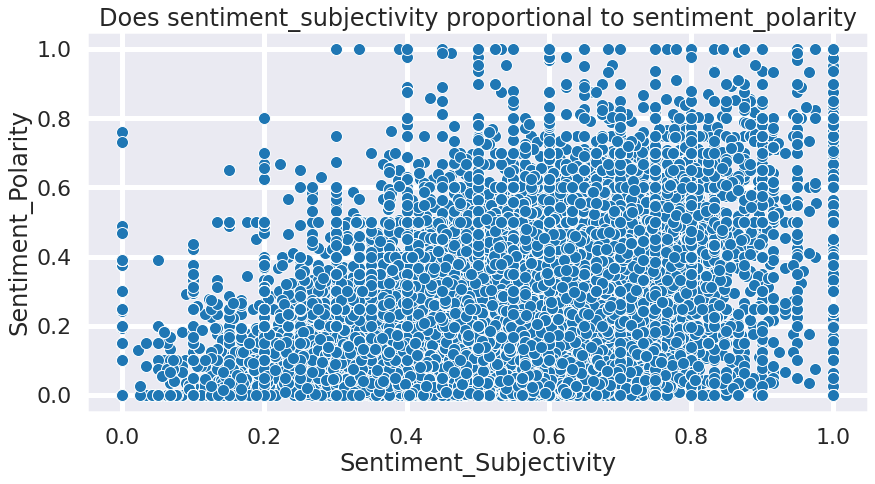

In [126]:
plt.figure(figsize=(14,7))
sns.scatterplot(merged_df['Sentiment_Subjectivity'], merged_df['Sentiment_Polarity'])
plt.title("Does sentiment_subjectivity proportional to sentiment_polarity")
plt.show()

##From the above scatter plot it can be concluded that sentiment subjectivity is not always proportional to sentiment polarity but in maximum number of case, shows a proportional behavior, when variance is too high or low.

##Review Sentiments - Percentage.


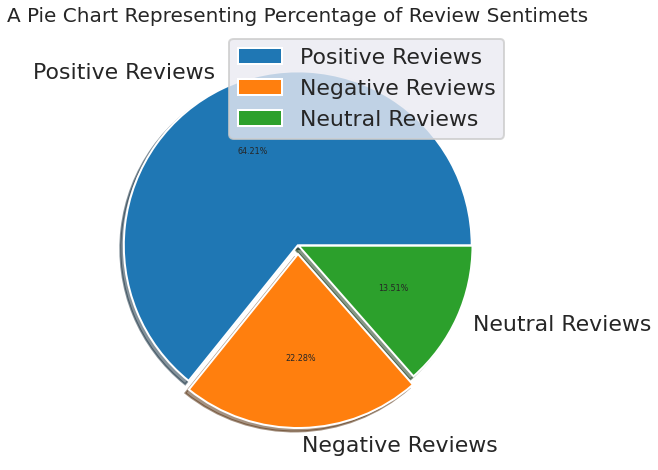

In [127]:
import matplotlib
counts = list(merged_df['Sentiment'].value_counts())
labels = 'Positive Reviews', 'Negative Reviews','Neutral Reviews'
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['figure.figsize'] = (8, 8)
plt.pie(counts, labels=labels, explode=[0, 0.05, 0.005], shadow=True, autopct="%.2f%%")
plt.title('A Pie Chart Representing Percentage of Review Sentimets', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

##<B>Conclusion